In [70]:
from torch import nn

class LinearRegression(nn.Module):
    def __init__(self, n_inputs: int):
        super().__init__()
        self.flatten = nn.Flatten()
        self.layer = nn.Linear(n_inputs, 1)
    
    def forward(self, x):
        predictions = self.layer(x)
        return predictions

In [92]:
import torch

def build_model(X, y, lr=1e-3, epochs=5):
    features = X.shape[1]
    model = LinearRegression(features)

    loss_fn = nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)

    loss_list = []

    for _ in range(epochs):
        model.train() # should be called every epoch

        predictions = model(X)
        loss = loss_fn(predictions, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_list.append(loss.item())

    return model, loss_list

In [108]:
import matplotlib.pyplot as plt

def plot_loss(loss_list: list):
    plt.plot(loss_list)
    plt.ylabel("Error")
    plt.xlabel("Epoch")
    plt.show()

### Question 1

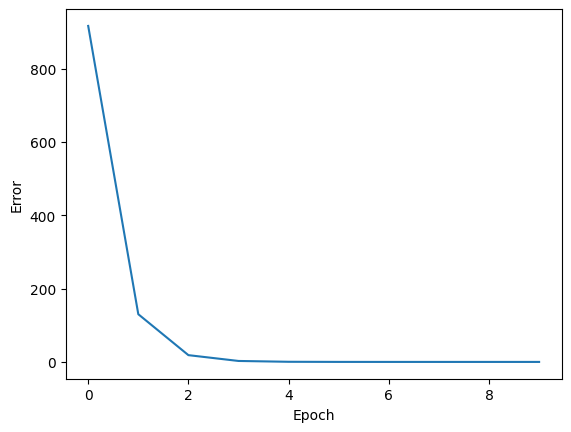

In [109]:
X = torch.tensor([
    12.4, 14.3, 14.5, 14.9, 16.1, 16.9, 16.5, 15.4, 17.0, 17.9, 18.8,
    20.3, 22.4, 19.4, 15.5, 16.7, 17.3, 18.4, 19.2, 17.4, 19.5, 19.7, 21.2
], dtype=torch.float32).unsqueeze(1)  # Shape (23,1)

y = torch.tensor([
    11.2, 12.5, 12.7, 13.1, 14.1, 14.8, 14.4, 13.4, 14.9, 15.6, 16.4,
    17.7, 19.6, 16.9, 14.0, 14.6, 15.1, 16.1, 16.8, 15.2, 17.0, 17.2, 18.6
], dtype=torch.float32).unsqueeze(1)  # Shape (23,1)

model, loss_list = build_model(X, y, epochs=10)
plot_loss(loss_list)

### Question 2

In [110]:
X = torch.tensor([[2], [4]], dtype=torch.float32)
y = torch.tensor([[20], [40]], dtype=torch.float32)

model, loss_list = build_model(X, y, epochs=2)

for epoch, loss in enumerate(loss_list):
    print(f"Epoch {epoch}, loss {loss}")

print()

for name, parameter in model.named_parameters():
    print(name, parameter.data)

Epoch 0, loss 1017.4527587890625
Epoch 1, loss 973.5668334960938

layer.weight tensor([[0.4320]])
layer.bias tensor([-0.2791])


### Question 3

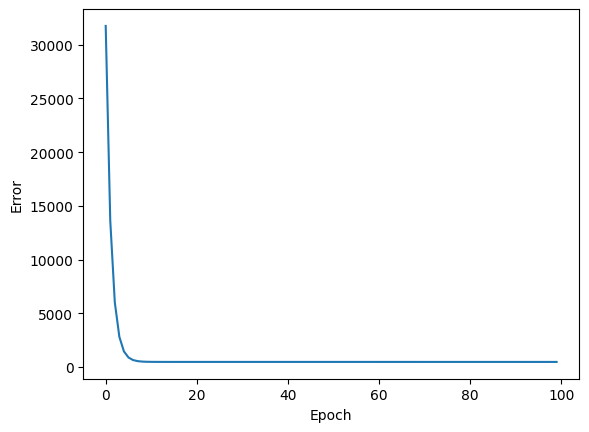

In [111]:
X = torch.tensor([5.0, 7.0, 12.0, 16.0, 20.0]).unsqueeze(1)
y = torch.tensor([40.0, 120.0, 180.0, 210.0, 240.0]).unsqueeze(1)

model, loss_list = build_model(X, y, epochs=100)
plot_loss(loss_list)

### Question 6

In [112]:
X = torch.tensor([
    [3, 8],
    [4, 5],
    [5, 7],
    [6, 3],
    [2, 1]
], dtype=torch.float32)

y = torch.tensor([-3.7, 3.5, 2.5, 11.5, 5.7]).unsqueeze(1)

model, loss_list = build_model(X, y)

### Question 7

In [113]:
from torch import nn

class LogisticRegression(nn.Module):
    def __init__(self, n_inputs: int):
        super().__init__()
        self.flatten = nn.Flatten()
        self.layer_stack = nn.Sequential(
            nn.Linear(n_inputs, 1),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        predictions = self.layer_stack(x)
        return predictions

In [114]:
import torch

# only two lines are different from before, marked in parentheses

def build_logistic_model(X, y, lr=1e-3, epochs=10):
    features = X.shape[1]
    model = LogisticRegression(features) # (1/2) 

    loss_fn = nn.BCELoss() # (2/2)
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)

    loss_list = []

    for _ in range(epochs):
        model.train() 

        predictions = model(X)
        loss = loss_fn(predictions, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_list.append(loss.item())

    return model, loss_list

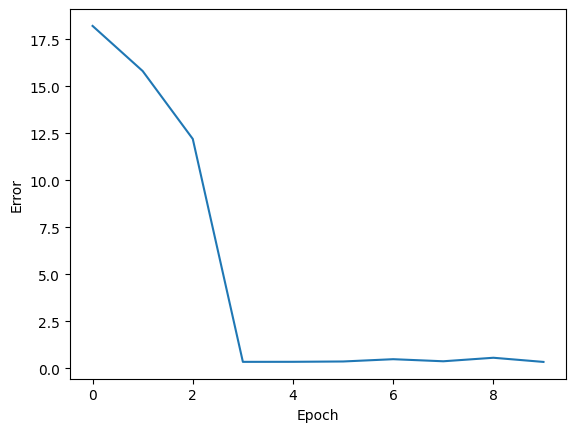

In [115]:
X = torch.tensor(
    [1, 5, 10, 10, 25, 50, 70, 75, 100],
    dtype=torch.float32
).unsqueeze(1)

y = torch.tensor(
    [0, 0, 0, 0, 0, 1, 1, 1, 1],
    dtype=torch.float32
).unsqueeze(1)

model, loss_list = build_logistic_model(X, y, lr=0.02)
plot_loss(loss_list)